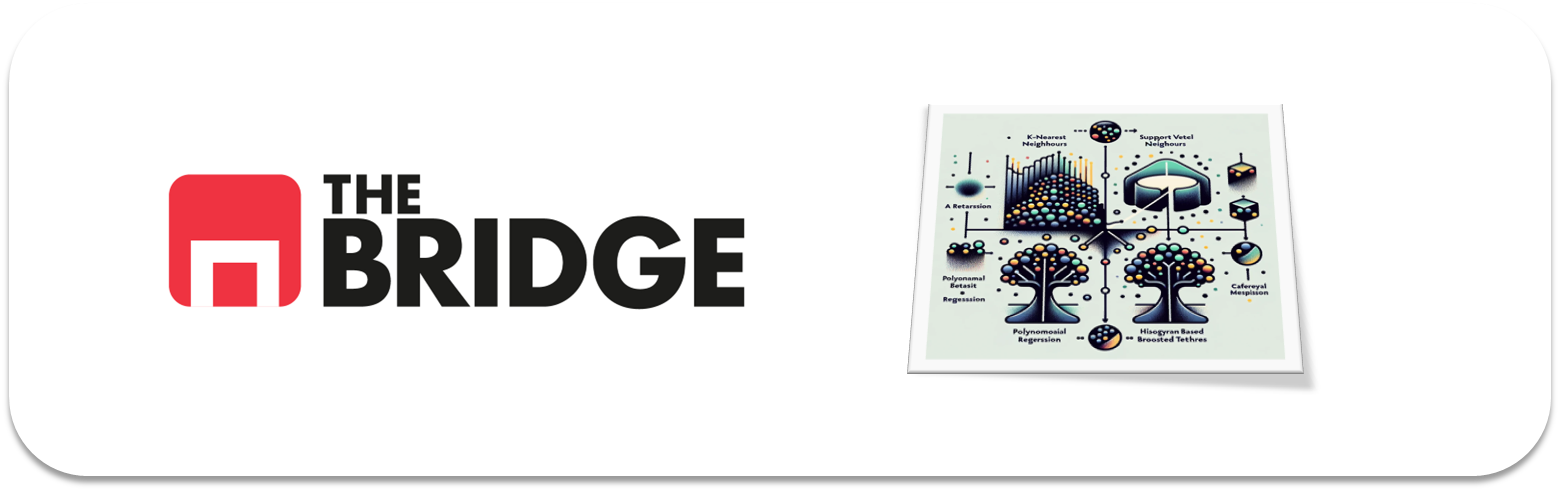

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [14]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler #elimina la clase que te sobra
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #es el que más se usa
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay # solo tiene sentido en clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [16]:
df = pd.read_csv("./data/credit_npo.csv")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [18]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [19]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [23]:
target = "SeriousDlqin2yrs"


### #1.3
Pinta la distribución de frecuencias del target y coméntala

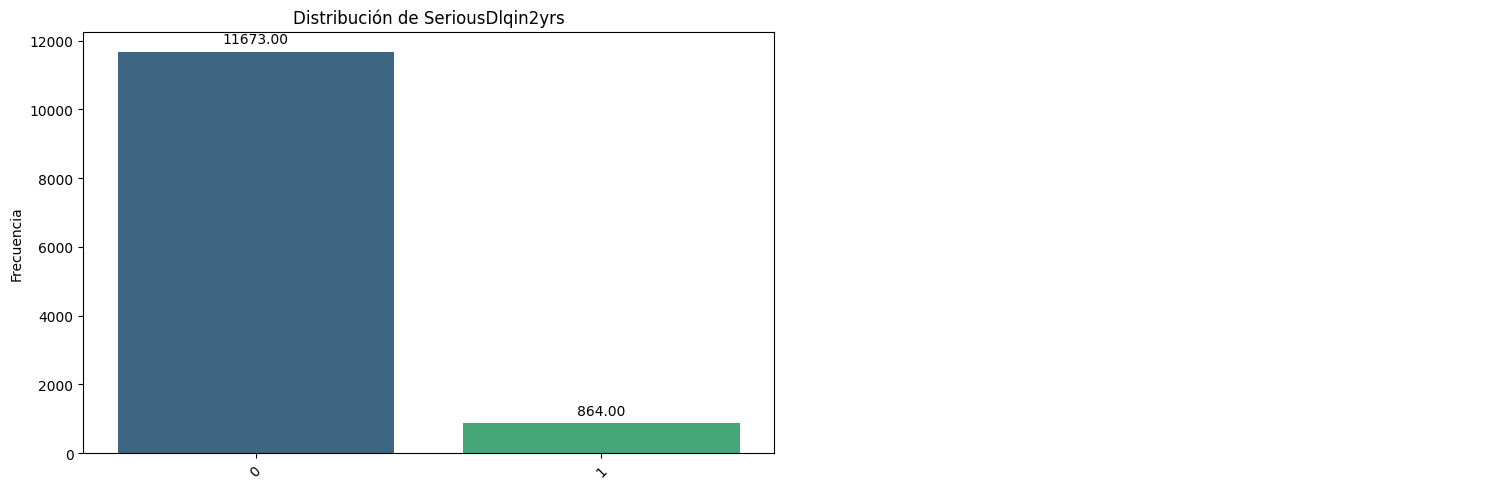

In [21]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores = True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [24]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]


In [28]:
moda_train = train_set[ndp].mode()
print(moda_train)

0    0.0
Name: NumberOfDependents, dtype: float64


In [29]:
moda_train = moda_train[0]
train_set[ndp] = train_set[ndp].fillna(moda_train)
test_set[ndp] = test_set[ndp].fillna(moda_train)

(2,)


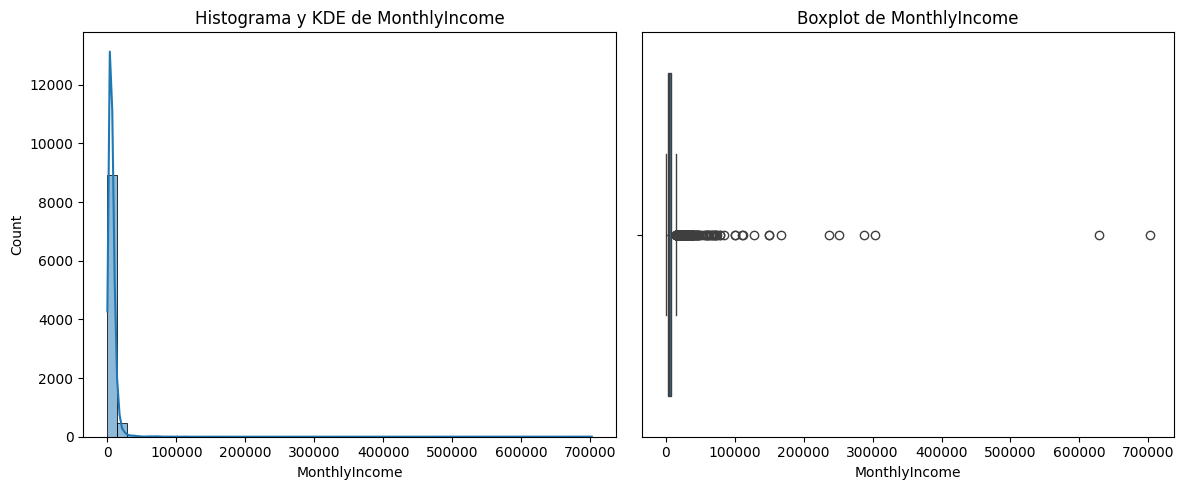

In [30]:
bt.plot_combined_graphs(train_set, columns = [mi], bins = 50)

In [35]:
mediana = train_set[mi].quantile(0.5)
train_set[mi] = train_set[mi].fillna(mediana)
test_set[mi]=  test_set[mi].fillna(mediana)

In [37]:
features_num = [col for col in train_set.columns if col not in features_cat and col != target]
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [38]:
features = features_num
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [39]:
numberOf = [col for col in train_set if col.startswith("NumberOfTime")]
for col in numberOf:
    print(f"Para pagadores, value_counts de {col}")
    print(train_set[train_set[target]==0][col].value_counts(True))
    print(f"Para impagados")
    print(train_set[train_set[target]== 1][col].value_counts(True))

Para pagadores, value_counts de NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime30-59DaysPastDueNotWorse
0     0.860956
1     0.100665
2     0.025300
3     0.006968
4     0.002895
5     0.001179
6     0.000858
98    0.000858
8     0.000214
7     0.000107
Name: proportion, dtype: float64
Para impagados
NumberOfTime30-59DaysPastDueNotWorse
0     0.524964
1     0.245364
2     0.118402
3     0.049929
4     0.028531
98    0.011412
5     0.011412
6     0.009986
Name: proportion, dtype: float64
Para pagadores, value_counts de NumberOfTimes90DaysLate
NumberOfTimes90DaysLate
0     0.966660
1     0.024228
2     0.005253
3     0.002037
98    0.000858
4     0.000536
5     0.000214
13    0.000107
6     0.000107
Name: proportion, dtype: float64
Para impagados
NumberOfTimes90DaysLate
0     0.651926
1     0.152639
2     0.089872
3     0.035663
4     0.031384
98    0.011412
5     0.009986
6     0.005706
8     0.004280
7     0.004280
9     0.001427
10    0.001427
Name: proportion, dtype: float64
Para p

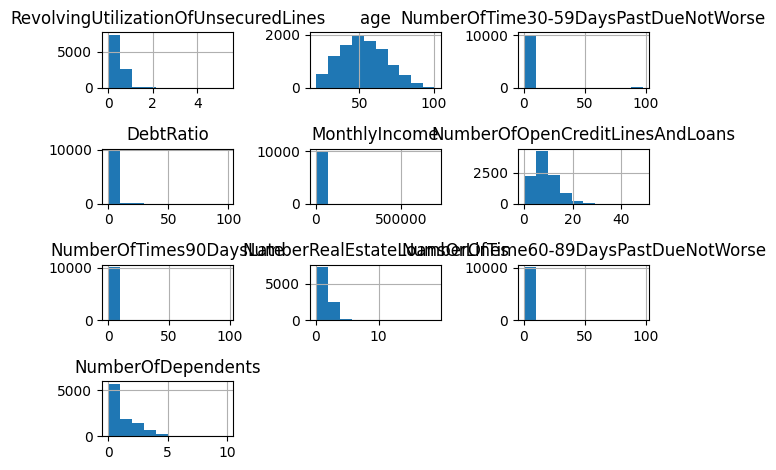

In [40]:
train_set[features].hist()
plt.tight_layout()


In [41]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [42]:
for col in features:
    if col != "age":
        train_set_scaled[col] = np.log(train_set_scaled[col] + 1)
        test_set_scaled[col] = np.log(test_set_scaled[col] + 1)

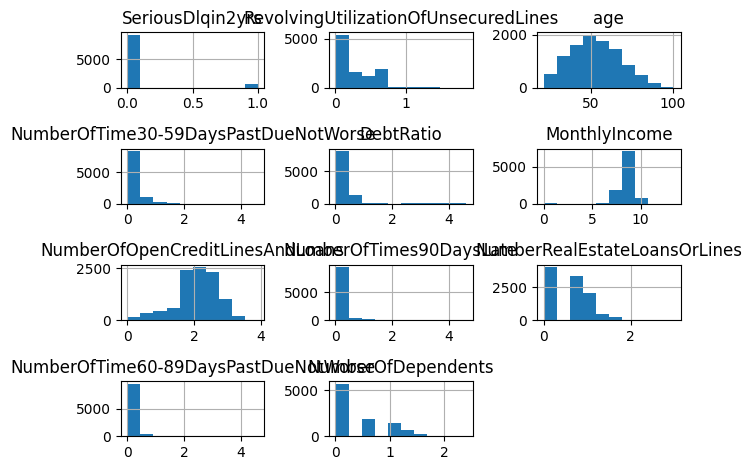

In [43]:
train_set_scaled.hist()
plt.tight_layout()

In [44]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [45]:
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]
y_train = train_set[target]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]
y_test = test_set[target]


In [46]:
knn_clf = KNeighborsClassifier(n_neighbors= 7)
knn_clf.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=7)

In [47]:
print(classification_report(y_train, knn_clf.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.71      0.27      0.39       701

    accuracy                           0.94     10029
   macro avg       0.83      0.63      0.68     10029
weighted avg       0.93      0.94      0.93     10029



In [50]:
modelos = ["KNN", "Logistic","RandomF", "XGBoost", "LightGBN"]
metricas = []
lr_clf= LogisticRegression(max_iter=10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf= XGBClassifier(max_depth=5, random_state=42)
lgb_clf = LGBMClassifier(max_depth=5, verbose= 100, random_state=42)

for nombre, modelo in zip(modelos,[knn_clf,lr_clf,rf_clf,xgb_clf,lgb_clf]):
    print(f"Para{nombre}:", end = "")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train,y_train, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled,y_train, cv = 5, scoring = 'balanced_accuracy'))
    print(metrica)
    metricas.append(metrica)

ParaKNN:

0.5844570166716769
ParaLogistic:0.5646898494947739
ParaRandomF:0.5541803547581452
ParaXGBoost:0.5852492267760151
ParaLightGBN:[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 561, number of negative: 7462
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.910216
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.382401
[LightGBM] [Debug] init for col-wise cost 0.000757 seconds, init for row-wise cost 0.000916 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info]

In [51]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote=  smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train)

In [52]:
modelos = ["KNN", "Logistic","RandomF", "XGBoost", "LightGBN"]
metricas = []
lr_clf= LogisticRegression(max_iter=10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf= XGBClassifier(max_depth=5, random_state=42)
lgb_clf = LGBMClassifier(max_depth=5, verbose= 100, random_state=42)
model = []

for nombre, modelo in zip(modelos,[knn_clf,lr_clf,rf_clf,xgb_clf,lgb_clf]):
    print(f"Para{nombre}:", end = "")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_smote,y_train_smote, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_smote_scaled,y_train_smote_scaled, cv = 5, scoring = 'balanced_accuracy'))
    print(metrica)
    metricas.append(metrica)

ParaKNN:0.8954758353950616
ParaLogistic:0.7818395501265771
ParaRandomF:0.8202200805151592
ParaXGBoost:0.9159556218373662
ParaLightGBN:[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7462, number of negative: 7462
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.834294
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.347085
[LightGBM] [Debug] init for col-wise cost 0.000761 seconds, init for row-wise cost 0.002038 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 14924, number of used feat